In [20]:
import os
import zipfile
import pandas as pd

# Function to rename the first column of a CSV file
def rename_first_column(csv_file):
    df = pd.read_csv(csv_file)
    df.columns.values[0] = 'timestamp'
    df.to_csv(csv_file, index=False)

# Directory containing the CSV files
directory = '/boot/1'

# Iterate over each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        rename_first_column(filepath)

# Zip all CSV files into one zip file
zip_filename = 'renamed_csv_files.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            zipf.write(os.path.join(directory, filename), arcname=filename)

print("CSV files renamed and zipped successfully.")


CSV files renamed and zipped successfully.


In [21]:
import numpy as np
import pandas as pd
import glob

# Define a function to process a single CSV file
def process_csv(file_path):
    # Load accelerometer data from the CSV file into a DataFrame
    accel_data = pd.read_csv(file_path)

    # Adjust negative timestamps to start from 0
    if accel_data['timestamp'].min() < 0:
        accel_data['timestamp'] = accel_data['timestamp'] - accel_data['timestamp'].min()

    # Convert milliseconds to seconds
    accel_data['timestamp'] = accel_data['timestamp'] / 1000.0

    # 1. Peak Acceleration
    peak_acceleration = accel_data[['x', 'y', 'z']].apply(np.max)

    # 2. Impact Magnitude
    accel_data['magnitude'] = np.sqrt(np.square(accel_data[['x', 'y', 'z']]).sum(axis=1))
    impact_magnitude = accel_data['magnitude'].max()

    # 3. Jerk Signals
    accel_data['jerk_x'] = np.gradient(accel_data['x'], accel_data['timestamp'])
    accel_data['jerk_y'] = np.gradient(accel_data['y'], accel_data['timestamp'])
    accel_data['jerk_z'] = np.gradient(accel_data['z'], accel_data['timestamp'])
    jerk_signals = accel_data[['jerk_x', 'jerk_y', 'jerk_z']].apply(np.max)

    # 4. Energy Measures
    energy_measures = np.sum(np.square(accel_data[['x', 'y', 'z']])) / len(accel_data)

    # 5. Skewness and Kurtosis
    skewness = accel_data[['x', 'y', 'z']].skew()
    kurtosis = accel_data[['x', 'y', 'z']].kurtosis()

    # 6. Zero-Crossing Rate
    zero_crossing_rate = ((accel_data['x'][:-1] * accel_data['x'][1:]) < 0).sum()

    # 7. Tilt Angle
    tilt_angle = np.arctan(np.sqrt(accel_data['x']**2 + accel_data['y']**2) / accel_data['z'])
    tilt_angle = np.degrees(tilt_angle)  # Convert to degrees

    # 8. Windowed Statistics
    windowed_statistics = accel_data[['x', 'y', 'z']].describe().loc[['mean', 'std']].values.flatten()

    # Additional features
    min_values = accel_data[['x', 'y', 'z']].min()
    avg_values = accel_data[['x', 'y', 'z']].mean()

    # Time column
    time_max = accel_data['timestamp'].max()
    time_min = accel_data['timestamp'].min()
    time_avg = accel_data['timestamp'].mean()

    # Combine all results into a single-row DataFrame
    result = pd.DataFrame({
        'File': file_path,
        'Peak_Acceleration_x': peak_acceleration['x'],
        'Peak_Acceleration_y': peak_acceleration['y'],
        'Peak_Acceleration_z': peak_acceleration['z'],
        'Impact_Magnitude': impact_magnitude,
        'Max_Jerk_x': jerk_signals['jerk_x'],
        'Max_Jerk_y': jerk_signals['jerk_y'],
        'Max_Jerk_z': jerk_signals['jerk_z'],
        'Energy_x': energy_measures['x'],
        'Energy_y': energy_measures['y'],
        'Energy_z': energy_measures['z'],
        'Skewness_x': skewness['x'],
        'Skewness_y': skewness['y'],
        'Skewness_z': skewness['z'],
        'Kurtosis_x': kurtosis['x'],
        'Kurtosis_y': kurtosis['y'],
        'Kurtosis_z': kurtosis['z'],
        'Zero_Crossing_Rate': zero_crossing_rate,
        'Mean_x': windowed_statistics[0],
        'Mean_y': windowed_statistics[1],
        'Mean_z': windowed_statistics[2],
        'Std_x': windowed_statistics[3],
        'Std_y': windowed_statistics[4],
        'Std_z': windowed_statistics[5],
        'Min_x': min_values['x'],
        'Min_y': min_values['y'],
        'Min_z': min_values['z'],
        'Avg_x': avg_values['x'],
        'Avg_y': avg_values['y'],
        'Avg_z': avg_values['z'],
        'Tilt_Angle': tilt_angle.mean(),
        'Time_Max': time_max,
        'Time_Min': time_min,
        'Time_Avg': time_avg
    }, index=[0])

    return result

# List all CSV files in the directory
csv_files = glob.glob('/bin/Untitled Folder/*.csv')

# Process each CSV file and concatenate the results
results = []
for file_path in csv_files:
    result = process_csv(file_path)
    results.append(result)

# Concatenate all results into a single DataFrame
final_result = pd.concat(results, ignore_index=True)

# Save the final result to a CSV file
final_result.to_csv('fall_detection_combined_result.csv', index=False)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * d

In [23]:
import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel('/final.xlsx')

# Replace 'inf' values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the average of respective columns
df.fillna(df.mean(), inplace=True)

# Write the updated DataFrame back to a CSV file
df.to_csv('updated_file.csv', index=False)


<ipython-input-23-b61cd35b7710>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


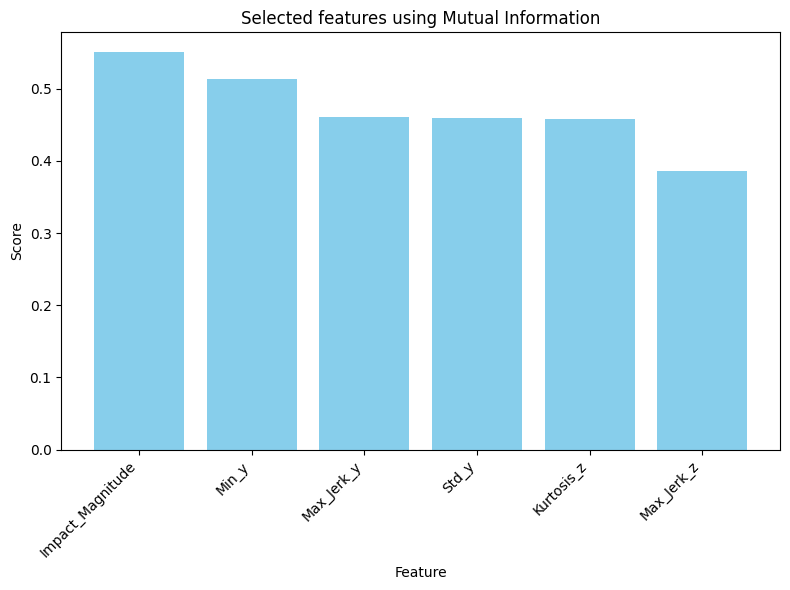

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [16 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


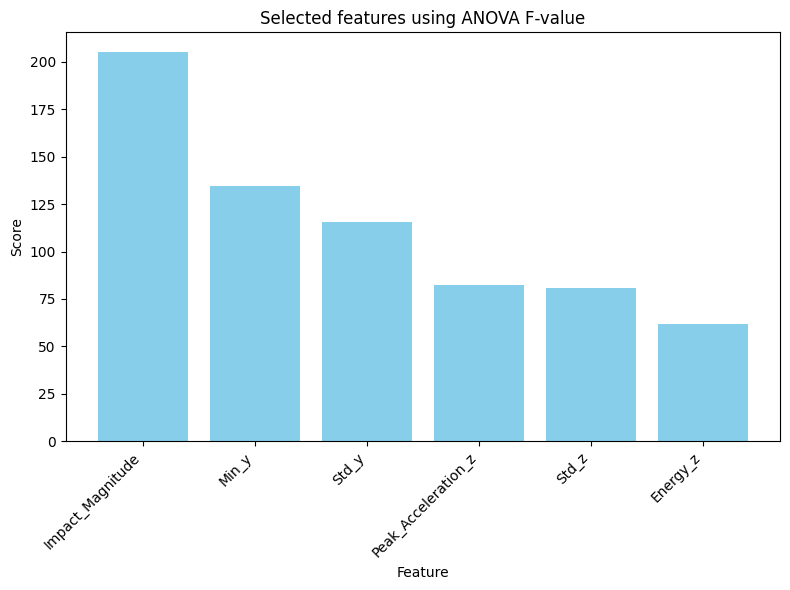

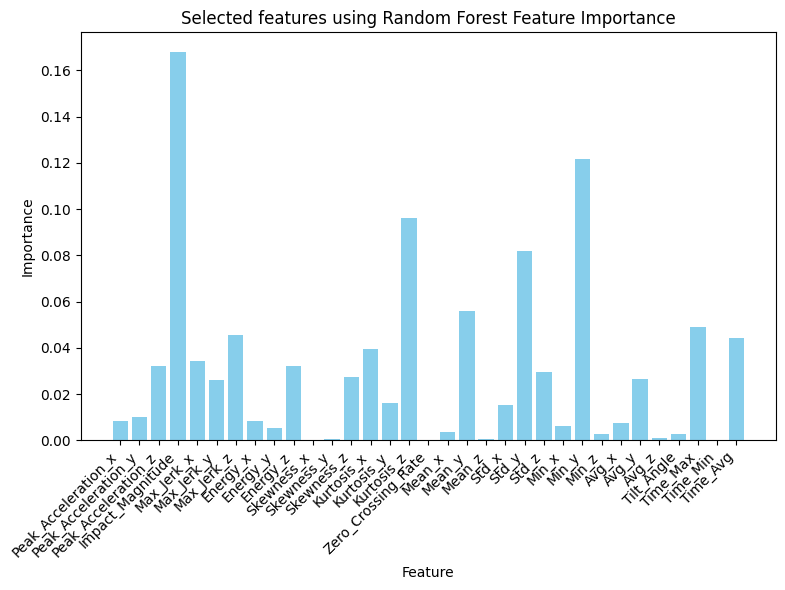

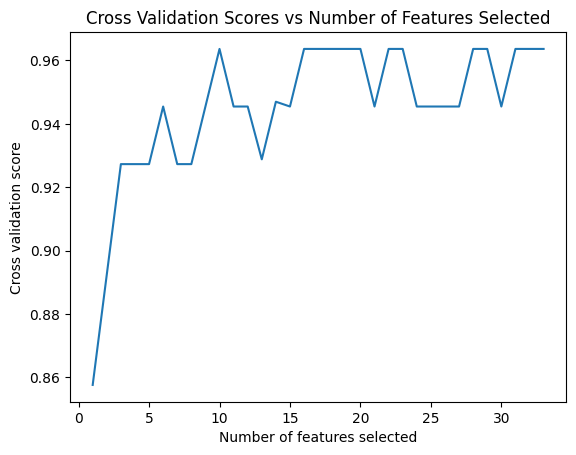

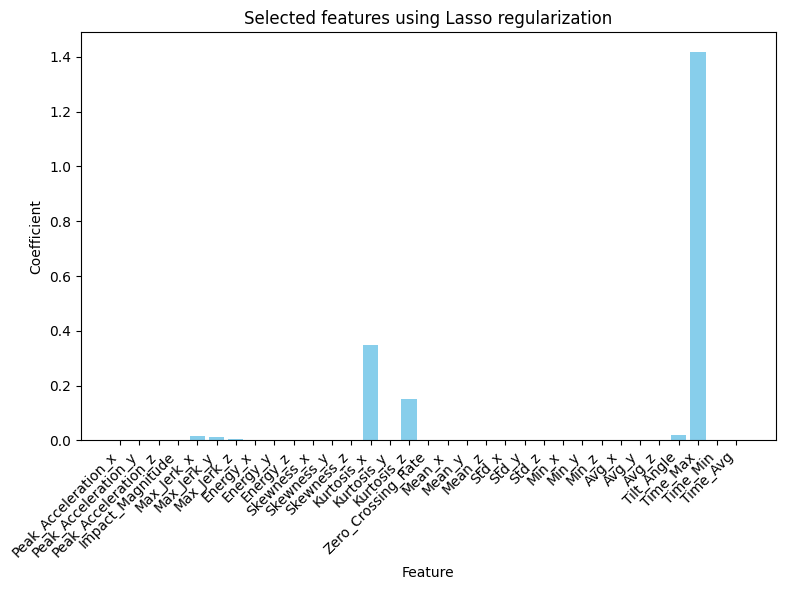

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load your dataset from CSV file
df = pd.read_csv('/content/updated_file.csv')

# Remove the 'timestamp' column
df.drop(columns=['File'], inplace=True)

# Extract features and target variable
X = df.drop(columns=['label'])  # Replace 'target_column' with the name of your target column
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to plot selected features
def plot_features(selector, feature_names, title, top_n=6):
    selected_features = selector.get_support(indices=True)
    selected_scores = selector.scores_[selected_features]
    sorted_indices = np.argsort(selected_scores)[::-1][:top_n]
    selected_feature_names = [feature_names[selected_features[i]] for i in sorted_indices]
    selected_scores = selected_scores[sorted_indices]

    plt.figure(figsize=(8, 6))
    plt.bar(range(len(selected_feature_names)), selected_scores, color='skyblue')
    plt.xticks(range(len(selected_feature_names)), selected_feature_names, rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.show()

# 1. Mutual Information
selector_mutual_info = SelectKBest(mutual_info_classif, k=7)
X_mutual_info = selector_mutual_info.fit_transform(X_train, y_train)
plot_features(selector_mutual_info, X.columns, "Selected features using Mutual Information")

# 2. ANOVA F-value
selector_f_classif = SelectKBest(f_classif, k=7)
X_f_classif = selector_f_classif.fit_transform(X_train, y_train)
plot_features(selector_f_classif, X.columns, "Selected features using ANOVA F-value")

# 3. Random Forest Feature Importance
selector_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_rf = selector_rf.fit_transform(X_train, y_train)
plt.figure(figsize=(8, 6))
plt.bar(range(len(X.columns)), selector_rf.estimator_.feature_importances_, color='skyblue')
plt.xticks(range(len(X.columns)), X.columns, rotation=45, ha='right')
plt.title("Selected features using Random Forest Feature Importance")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# 4. Recursive Feature Elimination with Cross-Validation (RFECV)
selector_rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=100, random_state=42), step=1, cv=5)
X_rfecv = selector_rfecv.fit_transform(X_train, y_train)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector_rfecv.cv_results_['mean_test_score']) + 1), selector_rfecv.cv_results_['mean_test_score'])
plt.title("Cross Validation Scores vs Number of Features Selected")
plt.show()

# 5. L1-based feature selection (Lasso regularization)
selector_lasso = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
X_lasso = selector_lasso.fit_transform(X_train, y_train)
plt.figure(figsize=(8, 6))
plt.bar(range(len(X.columns)), np.abs(selector_lasso.estimator_.coef_[0]), color='skyblue')
plt.xticks(range(len(X.columns)), X.columns, rotation=45, ha='right')
plt.title("Selected features using Lasso regularization")
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()


Random Forest: Accuracy = 1.0000
Gradient Boosting: Accuracy = 0.9643
Support Vector Machine: Accuracy = 0.8929
K-nearest Neighbors: Accuracy = 0.9643
Logistic Regression: Accuracy = 1.0000


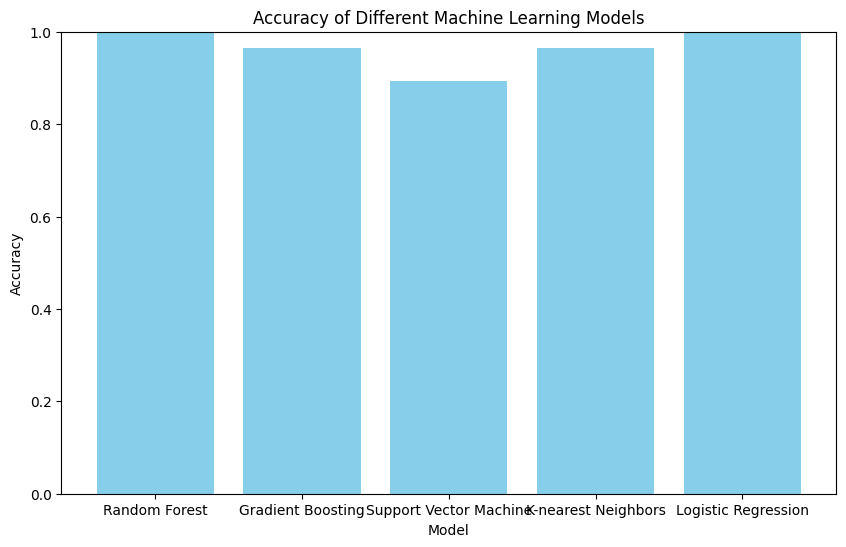

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('/content/updated_file.csv')  # Replace 'your_dataset.csv' with your dataset path
selected_features = ['Impact_Magnitude', 'Kurtosis_z', 'Min_y', 'Max_Jerk_y', 'Std_y', 'Std_z', 'Peak_Acceleration_z']
X = data[selected_features]
y = data['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy:.4f}')

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.ylim(0, 1)  # Limit y-axis to range from 0 to 1 (accuracy range)
plt.show()
